# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_list = []
for city in cities:
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    #print(requests.get(query_url).json())
    city_list.append(requests.get(query_url).json())

    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])  

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_list = []
lat = []
long = []
temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
for city in cities:
    try: 
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        print("city name is " + city)
    except:
        print("city not found")
    

city name is albany
city name is new norfolk
city name is puerto ayora
city not found
city name is hirado
city name is trairi
city name is jamestown
city name is ushuaia
city name is faanui
city name is hamilton
city not found
city name is butaritari
city name is itaberaba
city name is tuktoyaktuk
city name is bluff
city name is avera
city name is nouadhibou
city name is port hedland
city name is itarema
city name is vardo
city name is mar del plata
city name is cockburn town
city name is roald
city name is yumen
city not found
city name is fortuna
city name is bethel
city name is podporozhye
city not found
city name is ribeira grande
city name is tasiilaq
city name is corinto
city name is vaini
city name is whitefish
city name is bereda
city name is barrow
city name is pascagoula
city name is takanabe
city name is lazurne
city not found
city not found
city name is vangaindrano
city name is ravar
city name is dikson
city name is kruisfontein
city name is codrington
city name is hermanu

city name is nouakchott
city name is los patios
city name is kayerkan
city name is hofn
city name is vila franca do campo
city name is bundaberg
city name is padang
city name is kokopo
city name is zhezkazgan
city name is umm kaddadah
city name is dutlwe
city name is coquimbo
city name is cavalcante
city name is ossora
city name is indian head
city name is kalmar
city name is kidal
city name is mahajanga
city name is matara
city name is bama
city not found
city name is husavik
city name is kapit
city name is mopti
city name is boshnyakovo
city name is bogorodsk
city name is coolum beach
city name is lanigan
city name is do gonbadan
city name is suleja
city name is san borja
city name is port-gentil
city name is forestville
city not found
city name is port blair
city name is nantucket
city name is fort nelson
city name is berdigestyakh
city name is ballangen
city name is omsukchan
city name is mazamari
city name is kenai
city name is mehamn
city name is oranjemund
city name is lloydmins

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({"city_name": city_list,
                           "Date": date,
                          "Country": country,
                          "Latitude": lat,
                          "Longitude": long,
                          "Temperature": temp,
                           "Humidity": humidity,
                          "Cloudiness": cloud,
                          "Wind Speed": wind_speed})

weather_df.to_csv("weather_df.csv", encoding="utf-8", index=False)
weather_df.head(20)



,city_name,Date,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,albany,1596401825,US,42.60,-73.97,87.01,62,60,11.39
1,new norfolk,1596401825,AU,-42.78,147.06,45.00,82,78,1.99
2,puerto ayora,1596401825,EC,-0.74,-90.35,77.00,69,75,13.87
3,hirado,1596401826,JP,33.36,129.55,78.01,81,86,1.01
4,trairi,1596401826,BR,-3.28,-39.27,78.91,77,4,11.41
5,jamestown,1596401674,US,42.10,-79.24,73.99,88,90,13.87
6,ushuaia,1596401722,AR,-54.80,-68.30,41.00,75,20,19.46
7,faanui,1596401826,PF,-16.48,-151.75,78.46,79,100,11.54
8,hamilton,1596401826,US,39.18,-84.53,81.00,57,75,10.29
9,butaritari,1596401826,KI,3.07,172.79,82.53,74,9,15.32


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_100 = weather_df.loc[weather_df["Humidity"] > 100]
humidity_100

,city_name,Date,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


In [9]:
#  Get the indices of cities that have humidity over 100%.
print("There are none.")

There are none.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.head()


,city_name,Date,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,albany,1596401825,US,42.60,-73.97,87.01,62,60,11.39
1,new norfolk,1596401825,AU,-42.78,147.06,45.00,82,78,1.99
2,puerto ayora,1596401825,EC,-0.74,-90.35,77.00,69,75,13.87
3,hirado,1596401826,JP,33.36,129.55,78.01,81,86,1.01
4,trairi,1596401826,BR,-3.28,-39.27,78.91,77,4,11.41


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

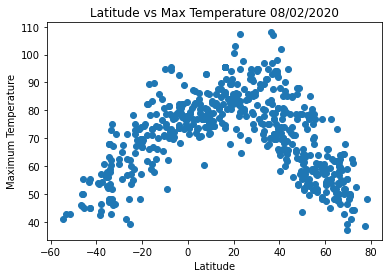

In [42]:

plt.scatter(lat, temp)
plt.title("Latitude vs Max Temperature 08/02/2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.show()
            

## Latitude vs. Humidity Plot

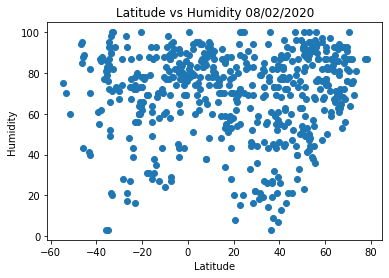

In [48]:

x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values)
plt.title("Latitude vs Humidity 08/02/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

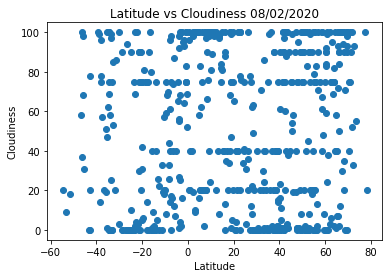

In [49]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.title("Latitude vs Cloudiness 08/02/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

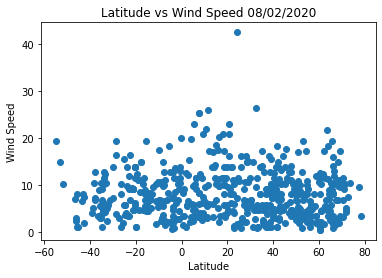

In [51]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.title("Latitude vs Wind Speed 08/02/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [44]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_plot(x_values, y_values, y_label, coordinate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
# Create Northern and Southern Hemisphere DataFrames\
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

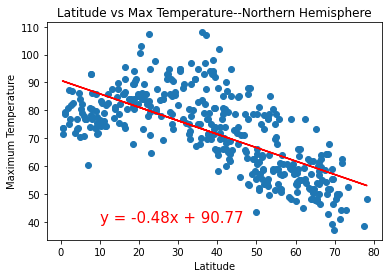

In [63]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Temperature"]
plt.title("Latitude vs Max Temperature--Northern Hemisphere")
linear_plot(x_values, y_values, "Maximum Temperature", (10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

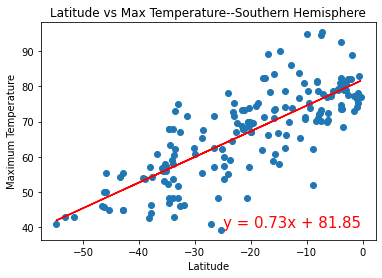

In [64]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Temperature"]
plt.title("Latitude vs Max Temperature--Southern Hemisphere")
linear_plot(x_values, y_values, "Maximum Temperature", (-25,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

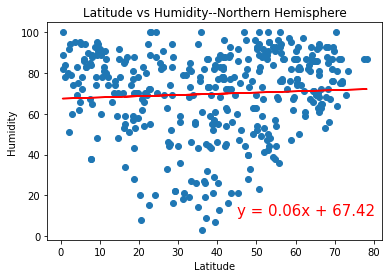

In [62]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
plt.title("Latitude vs Humidity--Northern Hemisphere")
linear_plot(x_values, y_values, "Humidity", (45,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

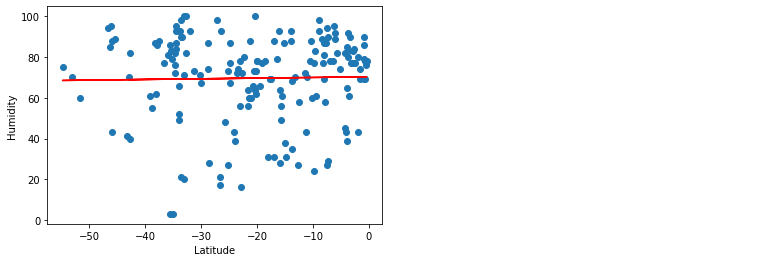

In [61]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
plt.title("Latitude vs Humidity 08/02/2020")
linear_plot(x_values, y_values, "Humidity", (45,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

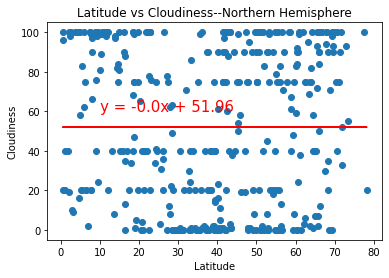

In [69]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
plt.title("Latitude vs Cloudiness--Northern Hemisphere")
linear_plot(x_values, y_values, "Cloudiness", (10,60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

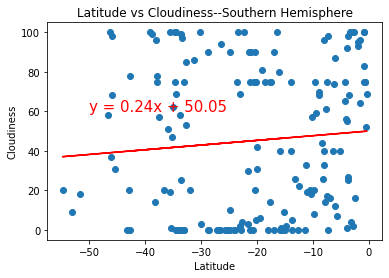

In [70]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
plt.title("Latitude vs Cloudiness--Southern Hemisphere")
linear_plot(x_values, y_values, "Cloudiness", (-50,60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

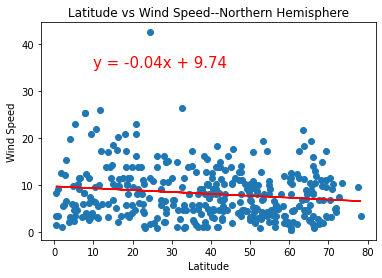

In [74]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
plt.title("Latitude vs Wind Speed--Northern Hemisphere")
linear_plot(x_values, y_values, "Wind Speed", (10,35))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

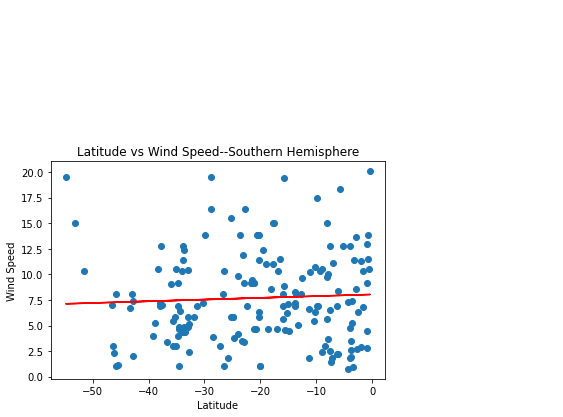

In [75]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
plt.title("Latitude vs Wind Speed--Southern Hemisphere")
linear_plot(x_values, y_values, "Wind Speed", (10,35))